In [1]:
# Feature Engineering (TF-IDF) + ML (SVM) 

In [2]:
# packages
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
import sys
import os
sys.path.insert(0, os.path.abspath('../../'))

# ModelEvaluation
from ModelEvaluation.ModelEvaluation import ModelEvaluation


In [4]:
# dataset
file_path = '../../datasets/amazon_user_reviews_text_sentiment.parquet'
df = pd.read_parquet(file_path)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18400 entries, 0 to 18399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sentiment     18400 non-null  int64 
 1   text_cleaned  18400 non-null  object
dtypes: int64(1), object(1)
memory usage: 287.6+ KB


In [5]:
# feature and target
features = "text_cleaned"
target = "sentiment"

# Feature Engineering (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
corpus = df[features]
X = vectorizer.fit_transform(corpus)

In [6]:
# training and test dataset split
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ModelTraining: SVM
model = SVC(probability=True, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)


MODEL EVALUATION METRICS
Accuracy:  0.6497
Precision: 0.6545
Recall:    0.6497
F1-Score:  0.6516

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.76      0.71      0.74      1243
           1       0.55      0.58      0.56      1209
           2       0.65      0.65      0.65      1228

    accuracy                           0.65      3680
   macro avg       0.65      0.65      0.65      3680
weighted avg       0.65      0.65      0.65      3680

ROC=AUC REPORT
AUC score: 0.8220991584141614


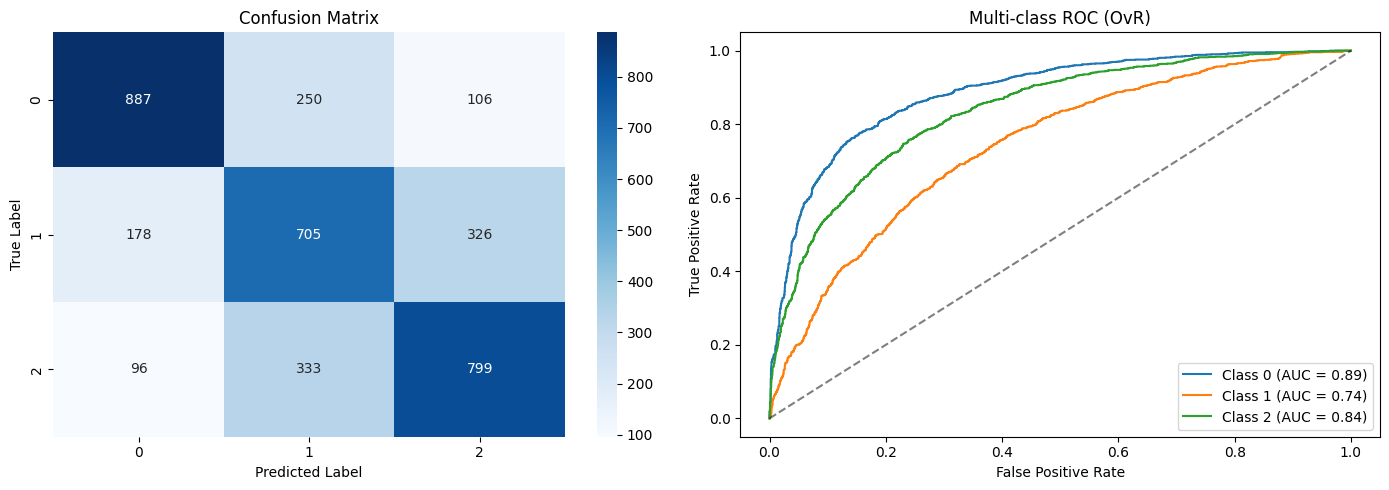

In [7]:
# Model Evaluation
evaluator = ModelEvaluation()
evaluator.run_pipeline(y_test, y_pred, y_score)